## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.296920 -1.604275 -1.720814  1.329253  0.863672  0.600873
1  0.748234  1.808751 -1.319888  0.587101  0.301273  0.919084
2 -0.809496  1.251246 -0.757642 -1.249666 -0.792602 -0.813628
3  0.316863 -0.685716 -1.453868  0.366933  1.571774  0.945456
4  0.985663 -0.339469  0.823582  1.492662 -0.415037  1.325832


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9593275	total: 56.3ms	remaining: 56.2s
1:	learn: 0.9487683	total: 56.9ms	remaining: 28.4s
2:	learn: 0.9375546	total: 57.4ms	remaining: 19.1s
3:	learn: 0.9273707	total: 57.8ms	remaining: 14.4s
4:	learn: 0.9185659	total: 58.3ms	remaining: 11.6s
5:	learn: 0.9089600	total: 58.7ms	remaining: 9.72s
6:	learn: 0.8981469	total: 59.2ms	remaining: 8.4s
7:	learn: 0.8876980	total: 59.6ms	remaining: 7.39s
8:	learn: 0.8781529	total: 60.2ms	remaining: 6.63s
9:	learn: 0.8677827	total: 60.8ms	remaining: 6.01s
10:	learn: 0.8588149	total: 61.3ms	remaining: 5.51s
11:	learn: 0.8484409	total: 61.8ms	remaining: 5.09s
12:	learn: 0.8387138	total: 62.4ms	remaining: 4.74s
13:	learn: 0.8314018	total: 62.9ms	remaining: 4.43s
14:	learn: 0.8246108	total: 63.4ms	remaining: 4.16s
15:	learn: 0.8172019	total: 63.8ms	remaining: 3.93s
16:	learn: 0.8084405	total: 64.2ms	remaining: 3.71s
17:	learn: 0.8002789	total: 64.6ms	remaining: 3.53s
18:	learn: 0.7926880	total: 65.1ms	remaining:

94:	learn: 0.4015521	total: 91.7ms	remaining: 874ms
95:	learn: 0.3990091	total: 92.1ms	remaining: 867ms
96:	learn: 0.3962939	total: 92.7ms	remaining: 863ms
97:	learn: 0.3933595	total: 93ms	remaining: 856ms
98:	learn: 0.3897564	total: 93.4ms	remaining: 850ms
99:	learn: 0.3869334	total: 93.8ms	remaining: 844ms
100:	learn: 0.3840109	total: 94.2ms	remaining: 838ms
101:	learn: 0.3805129	total: 94.5ms	remaining: 832ms
102:	learn: 0.3773381	total: 94.9ms	remaining: 826ms
103:	learn: 0.3744980	total: 95.3ms	remaining: 821ms
104:	learn: 0.3716783	total: 95.6ms	remaining: 815ms
105:	learn: 0.3688267	total: 95.8ms	remaining: 808ms
106:	learn: 0.3658075	total: 96.3ms	remaining: 803ms
107:	learn: 0.3628771	total: 96.6ms	remaining: 798ms
108:	learn: 0.3600269	total: 97ms	remaining: 793ms
109:	learn: 0.3574282	total: 97.3ms	remaining: 787ms
110:	learn: 0.3541839	total: 97.6ms	remaining: 782ms
111:	learn: 0.3517431	total: 98ms	remaining: 777ms
112:	learn: 0.3493695	total: 98.3ms	remaining: 772ms
113:	

322:	learn: 0.0933068	total: 184ms	remaining: 387ms
323:	learn: 0.0928984	total: 185ms	remaining: 386ms
324:	learn: 0.0923337	total: 185ms	remaining: 385ms
325:	learn: 0.0918988	total: 186ms	remaining: 384ms
326:	learn: 0.0912475	total: 186ms	remaining: 383ms
327:	learn: 0.0908196	total: 186ms	remaining: 382ms
328:	learn: 0.0904010	total: 187ms	remaining: 381ms
329:	learn: 0.0899913	total: 187ms	remaining: 380ms
330:	learn: 0.0895904	total: 188ms	remaining: 379ms
331:	learn: 0.0894109	total: 188ms	remaining: 379ms
332:	learn: 0.0892194	total: 189ms	remaining: 378ms
333:	learn: 0.0886315	total: 189ms	remaining: 377ms
334:	learn: 0.0884446	total: 189ms	remaining: 376ms
335:	learn: 0.0879450	total: 190ms	remaining: 375ms
336:	learn: 0.0873960	total: 190ms	remaining: 374ms
337:	learn: 0.0869131	total: 191ms	remaining: 374ms
338:	learn: 0.0865156	total: 191ms	remaining: 373ms
339:	learn: 0.0863155	total: 192ms	remaining: 372ms
340:	learn: 0.0859414	total: 192ms	remaining: 372ms
341:	learn: 

536:	learn: 0.0353911	total: 273ms	remaining: 235ms
537:	learn: 0.0352566	total: 273ms	remaining: 235ms
538:	learn: 0.0350906	total: 274ms	remaining: 234ms
539:	learn: 0.0349599	total: 275ms	remaining: 234ms
540:	learn: 0.0348326	total: 275ms	remaining: 233ms
541:	learn: 0.0346443	total: 275ms	remaining: 233ms
542:	learn: 0.0345089	total: 276ms	remaining: 232ms
543:	learn: 0.0343756	total: 276ms	remaining: 231ms
544:	learn: 0.0342129	total: 276ms	remaining: 231ms
545:	learn: 0.0340531	total: 277ms	remaining: 230ms
546:	learn: 0.0338944	total: 277ms	remaining: 230ms
547:	learn: 0.0337726	total: 278ms	remaining: 229ms
548:	learn: 0.0336437	total: 278ms	remaining: 228ms
549:	learn: 0.0335284	total: 279ms	remaining: 228ms
550:	learn: 0.0333845	total: 279ms	remaining: 228ms
551:	learn: 0.0332214	total: 280ms	remaining: 227ms
552:	learn: 0.0331046	total: 280ms	remaining: 227ms
553:	learn: 0.0329907	total: 281ms	remaining: 226ms
554:	learn: 0.0328664	total: 281ms	remaining: 225ms
555:	learn: 

747:	learn: 0.0158630	total: 366ms	remaining: 123ms
748:	learn: 0.0158113	total: 366ms	remaining: 123ms
749:	learn: 0.0157507	total: 367ms	remaining: 122ms
750:	learn: 0.0156993	total: 367ms	remaining: 122ms
751:	learn: 0.0156506	total: 368ms	remaining: 121ms
752:	learn: 0.0155532	total: 368ms	remaining: 121ms
753:	learn: 0.0154839	total: 369ms	remaining: 120ms
754:	learn: 0.0154217	total: 369ms	remaining: 120ms
755:	learn: 0.0153712	total: 369ms	remaining: 119ms
756:	learn: 0.0153036	total: 370ms	remaining: 119ms
757:	learn: 0.0152541	total: 370ms	remaining: 118ms
758:	learn: 0.0152023	total: 371ms	remaining: 118ms
759:	learn: 0.0151481	total: 371ms	remaining: 117ms
760:	learn: 0.0150820	total: 371ms	remaining: 117ms
761:	learn: 0.0150221	total: 372ms	remaining: 116ms
762:	learn: 0.0149731	total: 372ms	remaining: 116ms
763:	learn: 0.0149072	total: 373ms	remaining: 115ms
764:	learn: 0.0148544	total: 373ms	remaining: 115ms
765:	learn: 0.0147961	total: 374ms	remaining: 114ms
766:	learn: 

938:	learn: 0.0079911	total: 454ms	remaining: 29.5ms
939:	learn: 0.0079471	total: 454ms	remaining: 29ms
940:	learn: 0.0079322	total: 455ms	remaining: 28.5ms
941:	learn: 0.0078891	total: 455ms	remaining: 28ms
942:	learn: 0.0078727	total: 456ms	remaining: 27.6ms
943:	learn: 0.0078289	total: 456ms	remaining: 27.1ms
944:	learn: 0.0078019	total: 457ms	remaining: 26.6ms
945:	learn: 0.0077733	total: 457ms	remaining: 26.1ms
946:	learn: 0.0077308	total: 458ms	remaining: 25.6ms
947:	learn: 0.0077151	total: 459ms	remaining: 25.2ms
948:	learn: 0.0076729	total: 460ms	remaining: 24.7ms
949:	learn: 0.0076519	total: 460ms	remaining: 24.2ms
950:	learn: 0.0076312	total: 461ms	remaining: 23.7ms
951:	learn: 0.0075902	total: 461ms	remaining: 23.3ms
952:	learn: 0.0075627	total: 462ms	remaining: 22.8ms
953:	learn: 0.0075199	total: 462ms	remaining: 22.3ms
954:	learn: 0.0075130	total: 463ms	remaining: 21.8ms
955:	learn: 0.0074753	total: 463ms	remaining: 21.3ms
956:	learn: 0.0074407	total: 464ms	remaining: 20.8

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

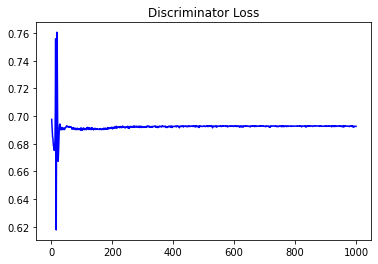

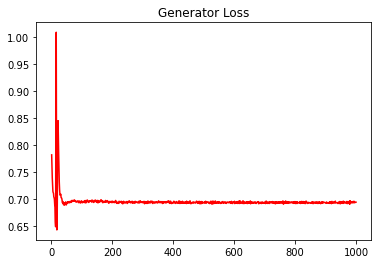

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.07429179925453223


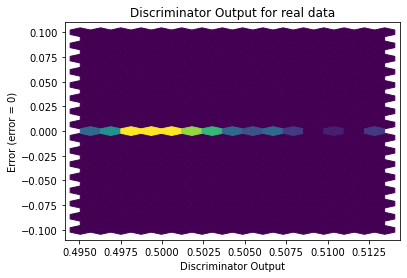

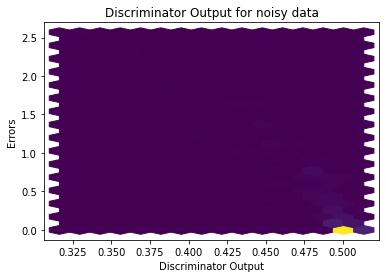

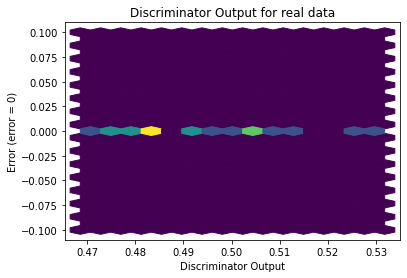

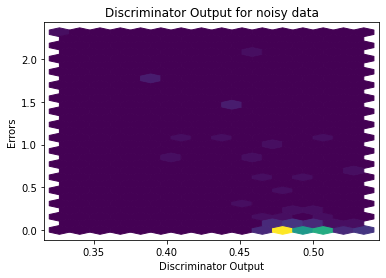

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


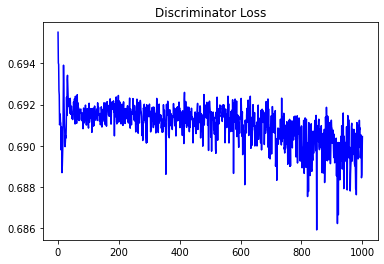

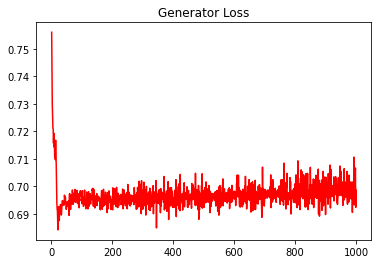

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.03524241916539601


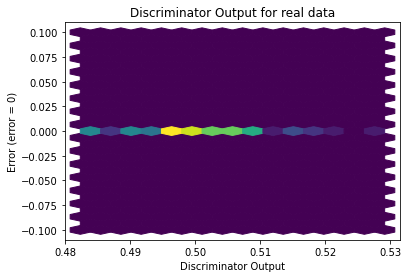

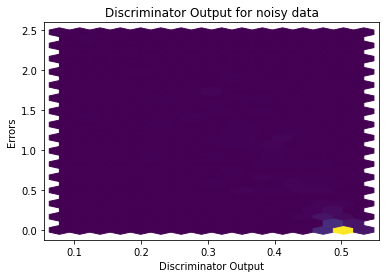

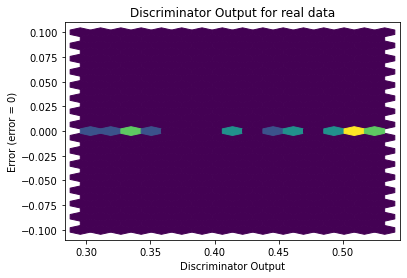

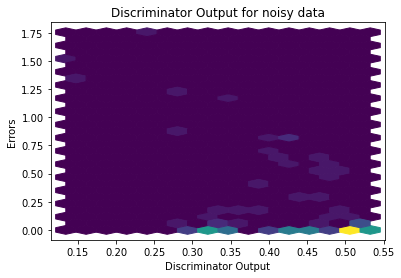

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1143]], requires_grad=True)
